# Scraping top 30 topics of Github 

 ### Agenda of this project:
 1. Download the github.com/topics page using requests
 2. Parse the contents using BeutifulSoup
 3. Garner top 30 topics details into a csv file including topic name, description and url 
 4. Repeat the above process for each topic to get the information about top repositories of the individual topics such as
    repository name, username and the number of views of the repository.
 5. Store the information of repositories into respective CSV files.
 

In [1]:
# Importing required libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

#### Defining a function to get the topic page
- Downloading https://github.com/topics using requests library.
- Checking if the status is successful
- parsing the content of the page using BeautifulSoup Library.

In [2]:
def get_topic_page():
    topics_url = 'https://github.com/topics'
    response = requests.get(topics_url)
    if response.status_code !=200:
        raise Exception('Failed to load page {}'.format(topics_url))
    doc = BeautifulSoup(response.text,'html.parser')
    return doc

In [3]:
doc = get_topic_page()


#### Defining a function to get the topic titles
- Finding all the 'p' tags of certain class and storing all the content to a list
- Similar procedure for topic description and topic url.

In [4]:
def get_topic_titles(doc):
    topic_title_tags = doc.find_all('p', class_='f3 lh-condensed mb-0 mt-1 Link--primary')
    # getting all the topic titles
    topic_title =[]
    for tags in topic_title_tags:
        topic_title.append(tags.text)
        
    return topic_title

In [5]:
title=get_topic_titles(doc)


In [6]:
len(title)

30

For getting the titles from the page, the 'p' tags associated to the title is being retrieved as below:

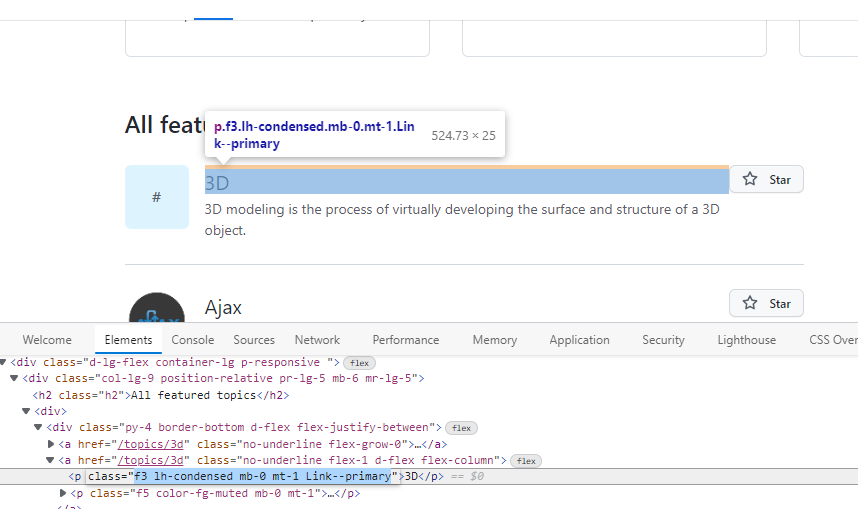


Similarly all the required informations have been retrieved.

#### Defining a function to get the topic description

In [7]:
def get_topic_desc(doc):
    topic_desc_tags = doc.find_all('p', class_='f5 color-fg-muted mb-0 mt-1')
    #getting topic descriptions
    topic_desc = []
    for tags in topic_desc_tags:
        topic_desc.append(tags.text.strip())
        
    return topic_desc

In [8]:
len(get_topic_desc(doc))

30

#### Defining a function to get the topic url

In [9]:
def get_topic_url(doc):
    topic_link_tags = doc.find_all('a', class_='no-underline flex-1 d-flex flex-column')
    #getting topic urls
    topic_url =[]
    base_url = 'https://github.com'

    for tags in topic_link_tags:
        topic_url.append(base_url + tags['href'])
    return topic_url

In [10]:
len(get_topic_url(doc))

30

#### Defining a function to gather the above informations into a pandas dataframe
- Creating a dictionary to store all the title, description, url infos into a dataframe.

In [11]:
def scrape_topics():
        
    topics_dict= {
        'title': get_topic_titles(doc),
        'description': get_topic_desc(doc),
        'url': get_topic_url(doc)
    }
        
    return pd.DataFrame(topics_dict)

In [12]:
scrape_topics()

,title,description,url
0,3D,3D modeling is the process of virtually develo...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino is an open source hardware and softwar...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


### Scraping informations about repositories from each individual topic

Following the above procedure the information of repositories such as 
1. Username 
2. Repository name 
3. Repo URL
4. Number of views 
etc have been retrieved.

### Defining a function to get the page URL.
- Following the same procedure as above to scrape page content using an object here which is to be used by following functions to get the data

In [13]:
def get_topic_page(topic_url):
    #Retrieving the page
    response = requests.get(topic_url)
    if response.status_code !=200:
        raise Exception('Failed to load page {}'.format(topic_url))
    # parse using bs4    
    topic_doc = BeautifulSoup(response.text,'html.parser')
    
    return topic_doc

In [36]:
document = get_topic_page('https://github.com/topics/3d')



### Defining a function to extract the number of stars from the available format " 60.7K "

In [15]:
def parse_star_count(stars_str):
    stars_str = stars_str.strip()
    if stars_str[-1]=='k':
        return int(float(stars_str[:-1])*1000)
    return int(stars_str)

### Defining a function to extract the repository informations such as username, repo name, stars and URL

- Finding all the 'h3' tags (parent tag) of the required 'a' tags
- Striping the username, repo name and url from the children 'a' tags

Follow the below screen shot for more understanding.

In [16]:
def get_repo_info(h3_tag, star_tag):
    # getting all the a tags inside the h3 tag
    a_tags = h3_tag.find_all('a')
    # striping the username info
    username = a_tags[0].text.strip()
    # striping the repo name info
    repo_name =a_tags[1].text.strip()
    #getting the url from href attr of the a tag
    base_url = 'https://github.com'
    repo_url = base_url + a_tags[1]['href']
    #getting the stars
    stars = parse_star_count(star_tag.text.strip())
    
    return username, repo_name, stars, repo_url

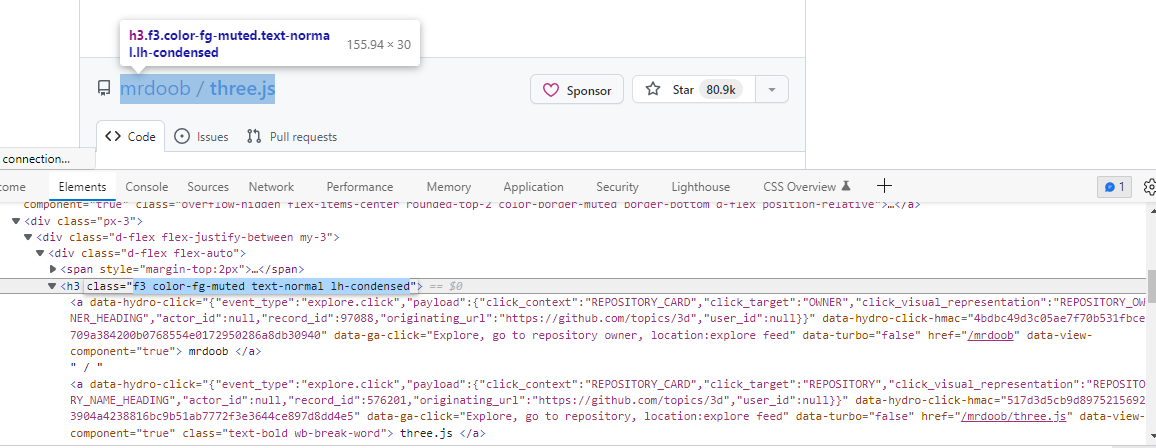

### Defining a function to garner all the repository informations parsed above, to a dataframe.
- creating a dictionary to store all username, repo name, repo url and number of views informations.
- Storing it into a dataframe by iterating over repo_tags to get each repository information.

In [37]:
def get_topic_repos(topic_doc):
    # collecting the parent tag of the required tags title, username, url
    repo_tags = topic_doc.find_all('h3',class_='f3 color-fg-muted text-normal lh-condensed')
    # collecting the star tags
    star_tags = topic_doc.find_all('span',class_='Counter js-social-count')
    # creating a dictionary to store all the info
    topic_repo_dict ={
    'username':[],
    'repo_name':[],
    'stars':[],
    'repo_url': []
    }
    # get repo info
    
    for i in range(len(repo_tags)):
        # getting repository info from get_repo_info function
        repo_info = get_repo_info(repo_tags[i],star_tags[i])
        #appending info into the dictionary
        topic_repo_dict['username'].append(repo_info[0])
        topic_repo_dict['repo_name'].append(repo_info[1])
        topic_repo_dict['stars'].append(repo_info[2])
        topic_repo_dict['repo_url'].append(repo_info[3])
        
    return pd.DataFrame(topic_repo_dict)

In [38]:
get_topic_repos(document)

,username,repo_name,stars,repo_url
0,mrdoob,three.js,80900,https://github.com/mrdoob/three.js
1,libgdx,libgdx,19800,https://github.com/libgdx/libgdx
2,pmndrs,react-three-fiber,17500,https://github.com/pmndrs/react-three-fiber
3,BabylonJS,Babylon.js,16500,https://github.com/BabylonJS/Babylon.js
4,aframevr,aframe,14000,https://github.com/aframevr/aframe
5,ssloy,tinyrenderer,13500,https://github.com/ssloy/tinyrenderer
6,lettier,3d-game-shaders-for-beginners,12600,https://github.com/lettier/3d-game-shaders-for...
7,FreeCAD,FreeCAD,11100,https://github.com/FreeCAD/FreeCAD
8,metafizzy,zdog,9100,https://github.com/metafizzy/zdog
9,CesiumGS,cesium,8500,https://github.com/CesiumGS/cesium


### Defining a function to store repo infos into CSV.
- Creating the csv file by pandas to_csv
- Checking if the file already exist by python OS module.

In [39]:
def repo_info_csv(topic_url,topic_name):
    fname = topic_name + '.csv'
    # checking if any file name already exists
    if os.path.exists(fname):
        print('The file {} already exists. Skipping...'.format(fname))
        return
    topic_df = get_topic_repos(document)
    topic_df.to_csv(fname,index=None)

### Putting everthing all together into a single function

- calling the scrape_topics( ) function to get all topic details as topic_df
- Iterating over each "topic_df" dataframe rows to scrape top repository infos of each topic and storing them into respective CSV by calling 
  repo_info_csv() function.

In [40]:
def scrape_topic_repos():
    print('Scraping list of topics')
    
    # collecting all the details of topics
    topics_df = scrape_topics()
    
    # getting all the repo csvs
    for index, row in topics_df.iterrows():
        print('Scraping top repositories for "{}"'.format(row['title']))
        repo_info_csv(row['url'],row['title'])

In [42]:
scrape_topic_repos()

#### Summary of the project:
- Scraping github topics information (title, Description and url) and storing them into a dataframe scrape_topics().
- Scraping top repositories of each topic to get information such as username, repository name, repository url, total number of views.
- Storing the repository infpormations of every topic into their respective CSV files.

#### Libraries/Modules Used:
- Python Pandas
- Python BeautifulSoup
- Python Requests
- Python os module

#### References used:
- https://docs.python-requests.org/en/latest/
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/
- https://pandas.pydata.org/docs/user_guide/index.html
- https://youtube.com
- https://github.com/topics
- https://github.com/topics/3d

#### Ideas for further work:
- Merging all the csv files into one sing sql/excel.
- Creating visualisations of the data for more insights.
